In [1]:
import tensorflow as tf
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler


/home/kanchana/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
X=tf.placeholder(tf.float32, shape=[None,784])
y=tf.placeholder(tf.float32,shape=[None,10])


In [3]:
W=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))

In [4]:
with open('Data/train_X.p', 'rb') as f:
    train_X = pickle.load(f)
with open('Data/train_y.p', 'rb') as f:
    train_y = pickle.load(f)
with open('Data/test_X.p', 'rb') as f:
    test_X = pickle.load(f)
with open('Data/test_y.p', 'rb') as f:
    test_y = pickle.load(f)
with open('Data/val_X.p', 'rb') as f:
    val_X = pickle.load(f)
with open('Data/val_y.p', 'rb') as f:
    val_y = pickle.load(f)

In [5]:
train_X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_y.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0


In [7]:
print("Shape of train_X:",train_X.shape)
print("Shape of train_y:",train_y.shape)
print("Shape of val_X:",val_X.shape)
print("Shape of val_y:",val_y.shape)
print("Shape of test_X:",test_X.shape)
print("Shape of test_y:",test_y.shape)

Shape of train_X: (55000, 784)
Shape of train_y: (55000, 10)
Shape of val_X: (5000, 784)
Shape of val_y: (5000, 10)
Shape of test_X: (10000, 784)
Shape of test_y: (10000, 10)


In [8]:
mean_image = np.mean(train_X, axis=0)
train_X -= mean_image
val_X -= mean_image
test_X -= mean_image

#std=StandardScaler()
#std.fit(train_X)
#std.transform(train_X)
#$std.transform(val_X)
#std.transform(test_X)
#train_X.head()

In [9]:
def getBatch(i, size, trainFeatures, trainLabels):
    startIndex = i * size
    endIndex = startIndex + size
    batch_X = trainFeatures[startIndex : endIndex]
    batch_Y = trainLabels[startIndex : endIndex]
    return batch_X, batch_Y


In [10]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def weight_he_init(n_inputs, n_outputs, uniform=True):
    init_range = tf.sqrt(2.0 / (n_inputs))
    return tf.random_uniform_initializer(-init_range, init_range)


def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [11]:
W_conv1 = tf.get_variable("W1",shape=[3, 3, 1, 32], initializer=weight_he_init(3*3*1, 32))
b_conv1 = bias_variable([32])
x_image = tf.reshape(X, [-1, 28, 28, 1])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
#W_conv0 = tf.get_variable("W2",shape=[3, 3,64, 32], initializer=weight_he_init(3*3*64, 32))
#b_conv0 = bias_variable([32])
#h_conv0 = tf.nn.relu(conv2d(h_conv1, W_conv0) + b_conv0)
h_pool1 = max_pool_2x2(h_conv1)

In [12]:
W_conv2 = tf.get_variable("W3",shape=[3, 3, 32, 32], initializer=weight_he_init(3*3*32, 32))
b_conv2 = bias_variable([32])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [13]:
W_fc1 = tf.get_variable("W4",shape=[7 * 7 * 32, 256], initializer=weight_he_init(7*7*32, 256))
b_fc1 = bias_variable([256])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*32])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [14]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
W_fc2 =tf.get_variable("W5",shape=[256, 10], initializer=weight_he_init(256, 10))
b_fc2 = bias_variable([10])

y_pred = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [15]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_pred))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
n_epochs = 20
batch_size = 50
val_acc=0

In [16]:

with tf.Session() as sess:
   saver.restore(sess,"model/model7.ckpt")
#   train_accuracy = accuracy.eval(feed_dict={X: train_X[:10000], y: train_y[:10000], keep_prob: 1.0})
   for i in range(10):
      val_accuracy = accuracy.eval(feed_dict={X: val_X[val_y[:][i]==1], y: val_y[val_y[:][i]==1], keep_prob: 1.0})
      print('val accuracy: %g' % (val_accuracy))
  

INFO:tensorflow:Restoring parameters from model/model7.ckpt
val accuracy: 0.934959
val accuracy: 0.976424
val accuracy: 0.863366
val accuracy: 0.941061
val accuracy: 0.875
val accuracy: 0.976891
val accuracy: 0.674847
val accuracy: 0.978346
val accuracy: 0.971888
val accuracy: 0.968627


In [27]:

with tf.Session() as sess:
   saver.restore(sess,"model/model7.ckpt")
#   train_accuracy = accuracy.eval(feed_dict={X: train_X[:10000], y: train_y[:10000], keep_prob: 1.0})
   val_accuracy = accuracy.eval(feed_dict={X: val_X, y: val_y, keep_prob: 1.0})
   res6=sess.run(tf.argmax(y_pred, 1), feed_dict={X:val_X[val_y[:][6]==1],y: val_y[val_y[:][6]==1], keep_prob: 1.0})
   res0=sess.run(tf.argmax(y_pred, 1), feed_dict={X:val_X[val_y[:][0]==1],y: val_y[val_y[:][0]==1], keep_prob: 1.0})
   res2=sess.run(tf.argmax(y_pred, 1), feed_dict={X:val_X[val_y[:][2]==1],y: val_y[val_y[:][2]==1], keep_prob: 1.0})
   res4=sess.run(tf.argmax(y_pred, 1), feed_dict={X:val_X[val_y[:][4]==1],y: val_y[val_y[:][4]==1], keep_prob: 1.0})
   print('val accuracy: %g' % (val_accuracy))

INFO:tensorflow:Restoring parameters from model/model7.ckpt
val accuracy: 0.9166


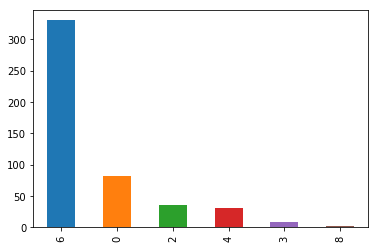

6    330
0     82
2     36
4     31
3      8
8      2
dtype: int64

In [19]:
s=pd.Series(res6)

p=s.value_counts()
p.plot(kind='bar')
plt.show()
p

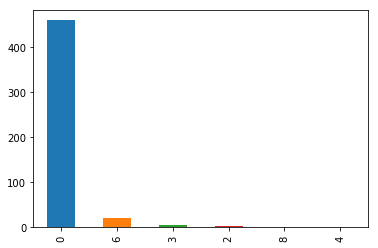

0    460
6     20
3      6
2      4
8      1
4      1
dtype: int64

In [20]:
s=pd.Series(res0)

p=s.value_counts()
p.plot(kind='bar')
plt.show()
p

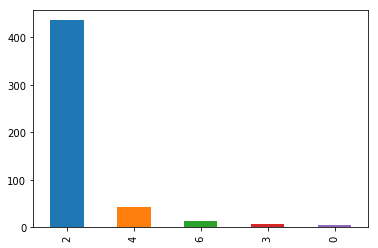

2    436
4     43
6     14
3      7
0      5
dtype: int64

In [21]:
s=pd.Series(res2)

p=s.value_counts()
p.plot(kind='bar')
plt.show()
p

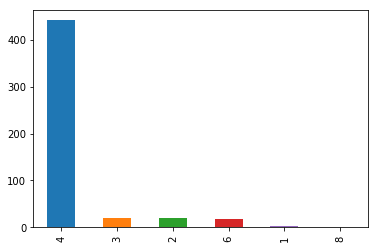

4    441
3     21
2     20
6     19
1      2
8      1
dtype: int64

In [22]:
s=pd.Series(res4)

p=s.value_counts()
p.plot(kind='bar')
plt.show()
p

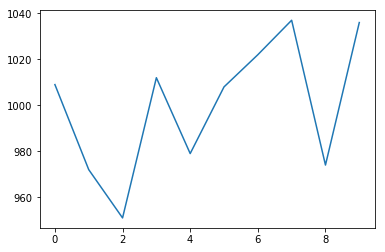

In [20]:
train_y[:10000].sum(axis=0).plot()
plt.show()
    

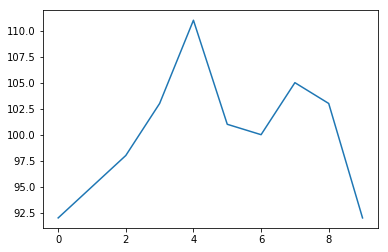

In [25]:
val_y[:1000].sum(axis=0).plot()
plt.show()

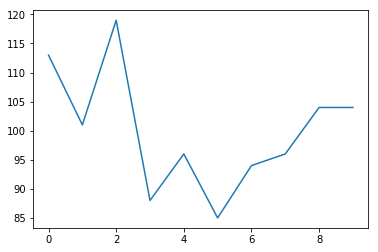

In [27]:
val_y[1000:2000].sum(axis=0).plot()
plt.show()

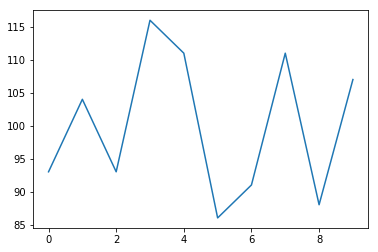

In [30]:
val_y[2000:3000].sum(axis=0).plot()
plt.show()

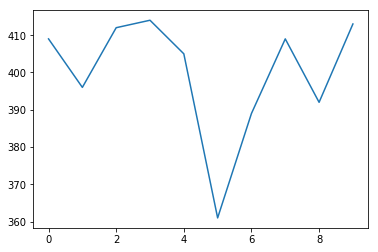

In [23]:
val_y[:4000].sum(axis=0).plot()
plt.show()

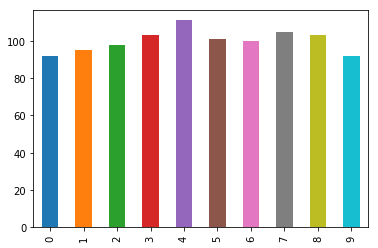

In [20]:
val_y[:1000].sum(axis=0).plot(kind='bar')
plt.show()

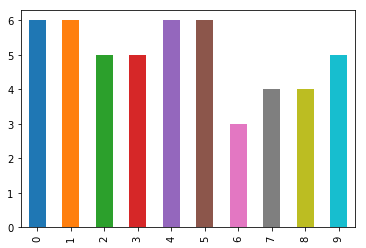

In [19]:
train_y[54950:55000].sum(axis=0).plot(kind='bar')
plt.show()

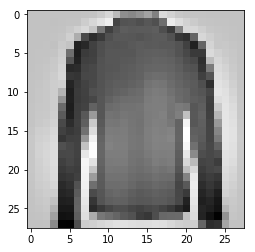

In [24]:
%matplotlib inline
sample_1 = np.reshape(list(val_X[val_y[:][6]==1].loc[55003]),(28,28))

plt.imshow(sample_1, cmap='Greys')

# Sample 2




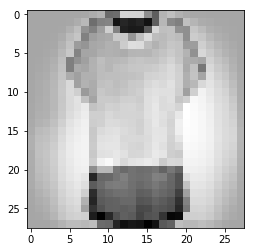

In [26]:
# Get 28x28 image
sample_2 = np.reshape(list(val_X[val_y[:][0]==1].loc[55021]),(28,28))
# Get corresponding integer label from one-hot encoded data
#sample_label_2 = np.where(fashion_mnist.train.labels[23] == 1)[0][0]
# Plot sample
#print("y = {label_index} ({label})".format(label_index=sample_label_2, label=label_dict[sample_label_2]))
plt.imshow(sample_2, cmap='Greys')